In [4]:
import sys
!{sys.executable} -m pip install -q seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## The various types of clustering are:

1. Connectivity-based Clustering (Hierarchical clustering) (BIRCH)
2. Centroids-based Clustering (Partitioning methods) (Kmeans)    
3. Distribution-based Clustering (Gaussian mixture)
4. Density-based Clustering (Model-based methods) (DBSCAN)
5. Fuzzy Clustering
6. Constraint-based (Supervised Clustering)

## Types of clustering algorithm:

1. K-Means clustering
2. Mini batch K-Means clustering algorithm
3. Mean Shift
4. Divisive Hierarchical Clustering
5. Hierarchical Agglomerative clustering
6. Gaussian Mixture Model
7. DBSCAN
8. OPTICS
9. BIRCH Algorithm


## Real life usecases:

[Clustering Algos](https://www.analytixlabs.co.in/blog/types-of-clustering-algorithms/)

* Market Segmentation.
* Retail marketing and sales (Density based)
* Social network analysis
* Wireless network analysis or Network traffic classification
* Image compression
* Data processing and feature weighing
* Regulating streaming services
* Tagging suggestions using co-occurrence
* Life science and Healthcare - (Mean shift clustering)
* Identifying good or bad content
* Anomaly detection 
* Fraud detection 
* Speech Recognition
* Image segmentation (K-means/centroid)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

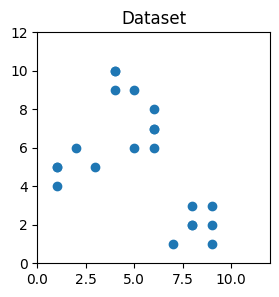

In [15]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
 
# Visualizing the data
plt.figure(figsize=(3,3))
plt.plot()
plt.xlim([0, 12])
plt.ylim([0, 12])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [20]:
distortions = [] ## Distortion is the average of the euclidean squared distance from the centroid of the respective clusters
inertias = [] ## Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid.
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [21]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.625551331197001
2 : 2.0318238533112596
3 : 1.2423303391744152
4 : 0.8367738708386461
5 : 0.7815457230272151
6 : 0.7018252785908823
7 : 0.6162229781573678
8 : 0.535457376582736
9 : 0.4517036572255866


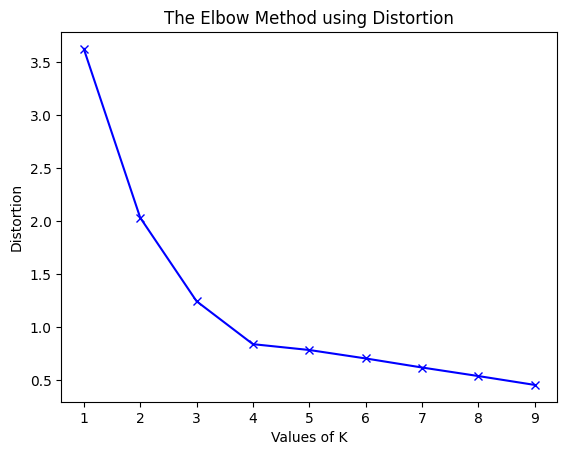

In [22]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## Silhouette method

## K-Means

### Advantages:

### Challenges:
* To find the optimum value of K. We use Kmeans++.
* Outliers have significant impact.

### Implement from scratch

In [46]:
def euclidean(point, data):
    
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """

    return np.sqrt(np.sum((point - data)**2, axis=1))

In [51]:
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
import random

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid

        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # This initial method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
            
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        # return the centroid and centroid ids for the test set
        centroids = []
        centroid_idxs = []

        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        
        return centroids, centroid_idx

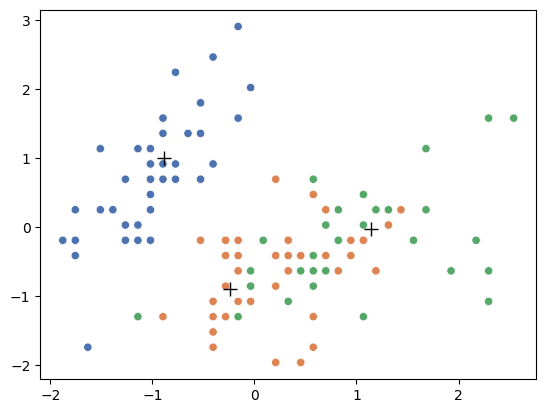

In [54]:
from sklearn.datasets import make_blobs

centers = 3
# X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)

X1_train = StandardScaler().fit_transform(X1_train)

kmeans = KMeans(n_clusters=centers, max_iter=300)
kmeans.fit(X1_train)

class_centers, classification = kmeans.evaluate(X1_train)

sns.scatterplot(x=[X[0] for X in X1_train],
                y=[X[1] for X in X1_train],
                hue=y1_train,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

In [89]:
from sklearn.datasets import load_iris, load_digits

# X1,y1 = load_iris(return_X_y=True)
X1,y1 = load_digits(return_X_y=True)

In [90]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X1,y1, test_size=0.2)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape
# X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [98]:
np.unique(y1_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)


In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,
                init="k-means++", # k-means++, random
                n_init=10, # Number of times the k-means algorithm is run with different centroid seeds. 
                max_iter=300,
                tol=1e-4,
                verbose=1,
                random_state=None,
                copy_x=True,
                algorithm="lloyd",) # lloyd, elkan, auto, full

# fitting the k means algorithm on scaled data
kmeans.fit(X1_train)

prediction = kmeans.predict(X1_test)
prediction

Initialization complete
Iteration 0, inertia 82131.60988430728.
Iteration 1, inertia 59023.99441691575.
Iteration 2, inertia 57963.34261080124.
Iteration 3, inertia 57542.05885203628.
Iteration 4, inertia 57297.698963845134.
Iteration 5, inertia 57096.27290823856.
Iteration 6, inertia 56761.675104521346.
Iteration 7, inertia 56394.01884955089.
Iteration 8, inertia 56289.786507642246.
Iteration 9, inertia 56226.59896241936.
Iteration 10, inertia 56188.868046666175.
Iteration 11, inertia 56145.92289253388.
Iteration 12, inertia 56100.60064963091.
Iteration 13, inertia 56049.82944886759.
Iteration 14, inertia 55870.395599514675.
Iteration 15, inertia 55661.62403897674.
Iteration 16, inertia 55577.612006557785.
Iteration 17, inertia 55522.5733226532.
Iteration 18, inertia 55509.535042900665.
Iteration 19, inertia 55504.66731118284.
Iteration 20, inertia 55503.6130806059.
Iteration 21, inertia 55503.09105338568.
Iteration 22, inertia 55501.47888135673.
Iteration 23, inertia 55500.4148645967

array([0, 4, 7, 1, 1, 8, 1, 4, 8, 1, 1, 9, 1, 1, 4, 1, 1, 1, 7, 7, 5, 7,
       9, 8, 1, 1, 1, 1, 1, 7, 1, 8, 3, 1, 7, 9, 7, 6, 0, 3, 3, 0, 7, 7,
       1, 1, 7, 4, 4, 5, 5, 7, 1, 1, 5, 5, 0, 1, 4, 8, 1, 3, 3, 4, 0, 7,
       1, 1, 6, 7, 0, 7, 4, 7, 4, 1, 7, 4, 1, 1, 3, 1, 3, 7, 5, 1, 0, 1,
       0, 7, 7, 6, 1, 1, 3, 1, 3, 3, 1, 3, 1, 5, 1, 4, 0, 7, 1, 6, 4, 1,
       3, 1, 7, 1, 8, 3, 5, 7, 7, 7, 6, 1, 1, 2, 1, 3, 7, 6, 4, 4, 8, 3,
       5, 4, 9, 6, 5, 7, 5, 7, 7, 7, 9, 1, 7, 6, 3, 1, 7, 2, 4, 5, 5, 8,
       4, 1, 3, 7, 3, 4, 7, 1, 5, 1, 1, 3, 1, 7, 9, 6, 9, 1, 7, 7, 7, 1,
       1, 1, 4, 8, 0, 1, 6, 7, 1, 4, 1, 1, 4, 4, 9, 1, 4, 1, 3, 9, 1, 6,
       7, 8, 4, 1, 3, 5, 4, 7, 3, 5, 5, 8, 6, 1, 1, 8, 3, 7, 9, 1, 6, 0,
       5, 9, 3, 1, 5, 8, 1, 6, 7, 7, 0, 3, 5, 3, 2, 7, 1, 8, 7, 1, 1, 6,
       5, 1, 0, 0, 5, 4, 6, 4, 3, 1, 1, 0, 4, 6, 7, 0, 9, 1, 1, 1, 9, 6,
       1, 1, 6, 7, 6, 1, 9, 0, 1, 4, 6, 0, 4, 8, 1, 8, 5, 2, 0, 7, 7, 6,
       6, 8, 1, 1, 1, 6, 4, 6, 0, 3, 9, 6, 7, 1, 3,

In [100]:
accuracy = np.mean(prediction == y1_test)
accuracy

0.008333333333333333

### Mean shift clustering - 

* The basic principle of the algorithm is to assign the data points to the specified clusters recursively by shifting points towards the peak or highest density of data points.
* The algorithm iteratively performs these shifts until the points converge to a local maximum of the density function
* Used in image segmentation process.
* No need to mention n_cluster before hand like KMeans.

**Algorithm**
* For each data point, calculate the mean of all points within a certain radius (i.e., the “kernel”) centered at the data point.
* Shift the data point to the mean.

### Gaussian Mixture Model (GMM)

* assumption that the data comprises Gaussian distributions.
* The probability of a point being a part of a cluster is inversely dependent on distance.
* GMM determines probabilities and allocates them to data points in the ‘K’ number of clusters. 
* Expectation Maximization technique.

* The Expectation-Maximization (EM) algorithm is an iterative way to find maximum-likelihood estimates for model parameters when the data is incomplete or has some missing data points or has some hidden variables.

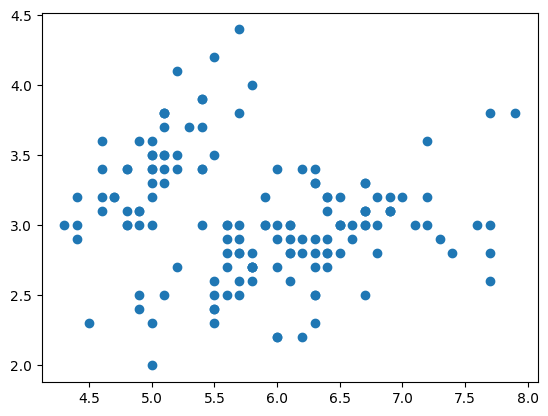

In [124]:
iris = load_iris()
 
# select first two columns 
X = iris.data[:, :2] 
# turn it into a dataframe
d = pd.DataFrame(X)
# plot the data
plt.scatter(d[0], d[1])
plt.show()

In [125]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3,
                      covariance_type="full", # {'full', 'tied', 'diag', 'spherical'})
                      n_init = 1,
                      init_params="kmeans") # kmeans, kmeans++,random, random_from_data
# Fit the GMM model for the dataset 
# which expresses the dataset as a 
# mixture of 3 Gaussian Distribution
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

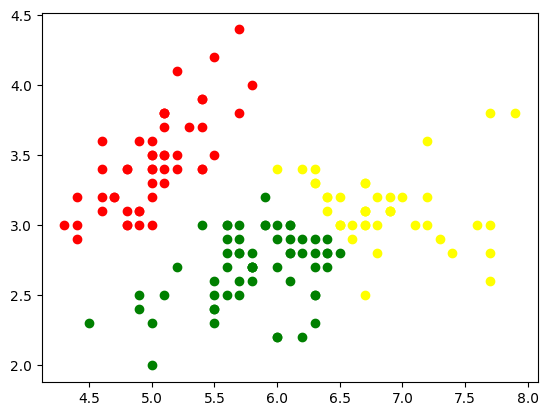

In [126]:
# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)- 

* Each cluster is separated from the others by points of low density. 
* We take 1 point. And mark the points coming within Radius as part of that cluster. Then move to the border point to mark them and their neighbors too.
* Cluster expansion is done by adding the reachable points in the proximity radius.
* CORE POINT - Point having least points within the distance from itself
* BORDER POINT - Point having at least one core point from a given distance.

In [116]:
from sklearn.cluster import DBSCAN
import numpy as np
# X = np.array([[1, 2], [2, 2], [2, 3],
#               [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=5, 
                    min_samples=5,
                    algorithm="auto", # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
                    metric = "euclidean") # Any from  sklearn.metrics.pairwise_distances
clustering.fit(X1_train)

clustering.labels_
prediction = clustering.fit_predict(X1_test)  # clustering
prediction

array([-1,  0, -1, -1,  1, -1,  1,  0, -1, -1,  1,  8,  1,  1,  0,  1,  1,
       -1,  1, -1,  2,  1,  8,  7, -1,  1,  1,  1, -1,  1, -1, -1,  3,  1,
        1, -1,  1,  4, -1, -1,  3, -1, -1,  1,  1,  1,  5,  0,  0,  2,  2,
       -1,  1,  1,  2,  2,  6,  9,  0, -1,  1, -1, -1,  0, -1,  1, -1,  1,
       -1,  1,  6,  1,  0,  1,  0,  1,  1,  0,  1,  9,  3, -1,  3,  1,  2,
       -1, -1,  1, -1,  1, -1,  4,  1,  1,  3, -1,  3,  3, -1,  3, -1,  2,
        1,  0, -1,  1,  1,  4,  0,  1,  3,  1,  1,  1, -1,  3,  2,  1,  1,
        1,  4,  1, -1, -1,  9,  3,  1,  4,  0,  0,  7, -1,  2,  0, -1,  4,
        2, -1,  2,  1,  5, -1, -1, -1,  1,  4,  3,  1,  1, -1,  0,  2,  2,
       -1,  0, -1,  3, -1, -1,  0,  1, -1,  2,  1,  1,  3, -1,  1, -1,  4,
       -1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  5,  1,  4, -1,  1,  0,  1,
       -1,  0,  0, -1,  1,  0,  5,  3, -1,  1, -1,  1,  1,  0,  1,  3,  2,
        0, -1,  3,  2,  2, -1,  4, -1,  1, -1,  3,  5, -1, -1,  4, -1,  2,
       -1, -1,  1,  2,  1

In [117]:
accuracy = np.mean(prediction == y1_test)
accuracy

0.22777777777777777

### BIRCH (Balanced Iterative Reducing and clustering using Hierarchies)

* It is a memory-efficient, online-learning algorithm provided as an alternative to MiniBatchKMeans. 
* Used for very large dataset.
* The algorithm only works to process metric attributes.
which means the one with no categorical variables or the attribute whose value can be represented by explicit coordinates in a Euclidean space.
* ** The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started.

* Scans the data once and loads it into a CF tree (Clustering Feature Tree).

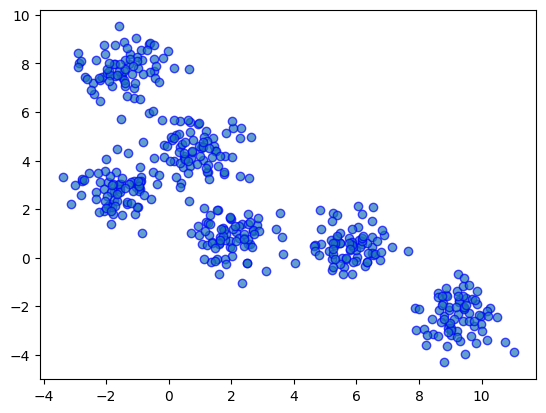

In [118]:
from sklearn.datasets import make_blobs

X, clusters = make_blobs(n_samples=450, centers=6, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [121]:
from sklearn.cluster import Birch

brc = Birch(branching_factor=50, # Maximum number of CF subclusters in each node
            n_clusters=None, # Number of clusters after the final clustering step
            threshold=1.5) # The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold
brc.fit(X)
prediction = brc.predict(X)
prediction

array([0, 0, 4, 2, 5, 5, 3, 5, 2, 3, 4, 0, 0, 1, 2, 3, 1, 0, 1, 4, 5, 4,
       0, 4, 3, 1, 0, 1, 1, 1, 3, 0, 3, 0, 3, 2, 1, 3, 0, 0, 1, 4, 4, 3,
       5, 3, 2, 3, 3, 4, 4, 2, 0, 2, 5, 5, 0, 5, 3, 0, 1, 2, 3, 0, 0, 1,
       3, 3, 4, 4, 3, 4, 3, 3, 2, 4, 1, 2, 2, 1, 3, 0, 3, 5, 2, 4, 3, 0,
       4, 1, 4, 3, 4, 1, 5, 3, 0, 0, 2, 5, 2, 3, 2, 1, 2, 5, 5, 4, 1, 2,
       4, 5, 0, 2, 4, 2, 1, 2, 4, 2, 1, 5, 2, 5, 4, 0, 3, 5, 2, 2, 2, 5,
       5, 1, 2, 2, 4, 5, 1, 5, 0, 1, 0, 2, 4, 3, 5, 1, 4, 2, 3, 5, 2, 0,
       2, 0, 4, 4, 4, 3, 3, 0, 1, 2, 2, 1, 0, 0, 5, 1, 2, 2, 5, 3, 1, 2,
       2, 4, 0, 1, 3, 2, 2, 1, 1, 4, 0, 5, 2, 3, 2, 2, 4, 5, 3, 0, 1, 4,
       4, 2, 1, 1, 1, 0, 0, 5, 0, 4, 1, 2, 0, 5, 2, 2, 5, 0, 0, 0, 3, 5,
       5, 0, 1, 5, 3, 1, 1, 1, 3, 5, 4, 0, 0, 5, 4, 5, 2, 3, 5, 5, 0, 3,
       5, 1, 5, 1, 5, 4, 0, 4, 0, 5, 3, 2, 0, 2, 4, 4, 5, 3, 5, 5, 0, 5,
       3, 2, 5, 4, 3, 5, 4, 3, 3, 1, 3, 0, 2, 5, 3, 5, 0, 1, 2, 4, 2, 5,
       2, 2, 4, 2, 2, 5, 3, 3, 2, 2, 2, 4, 1, 0, 4,

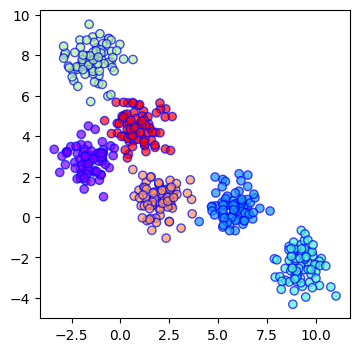

In [123]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=prediction, cmap='rainbow', alpha=0.7, edgecolors='b')